# Moving Min-Max Indicator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'hdfc.ns'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,2418.00,2438.500000,2409.000000,2433.949951,2329.374512,945874
2020-01-02 00:00:00+05:30,2430.00,2472.750000,2422.000000,2466.399902,2360.430176,1701396
2020-01-03 00:00:00+05:30,2455.00,2466.399902,2441.800049,2454.449951,2348.993652,1963923
2020-01-06 00:00:00+05:30,2428.00,2445.000000,2371.399902,2384.100098,2281.666748,2656731
2020-01-07 00:00:00+05:30,2401.25,2428.800049,2380.199951,2415.050049,2311.286621,3771992


In [3]:
n = 14
df['Minimum_Price'] = df['Adj Close'].rolling(n).min()
df['Moving_Minimum'] = df['Minimum_Price'].rolling(n).min()
df['Maximum_Price'] = df['Adj Close'].rolling(n).max()
df['Moving_Maximum'] = df['Maximum_Price'].rolling(n).max()

Text(0.5, 0, 'Date')

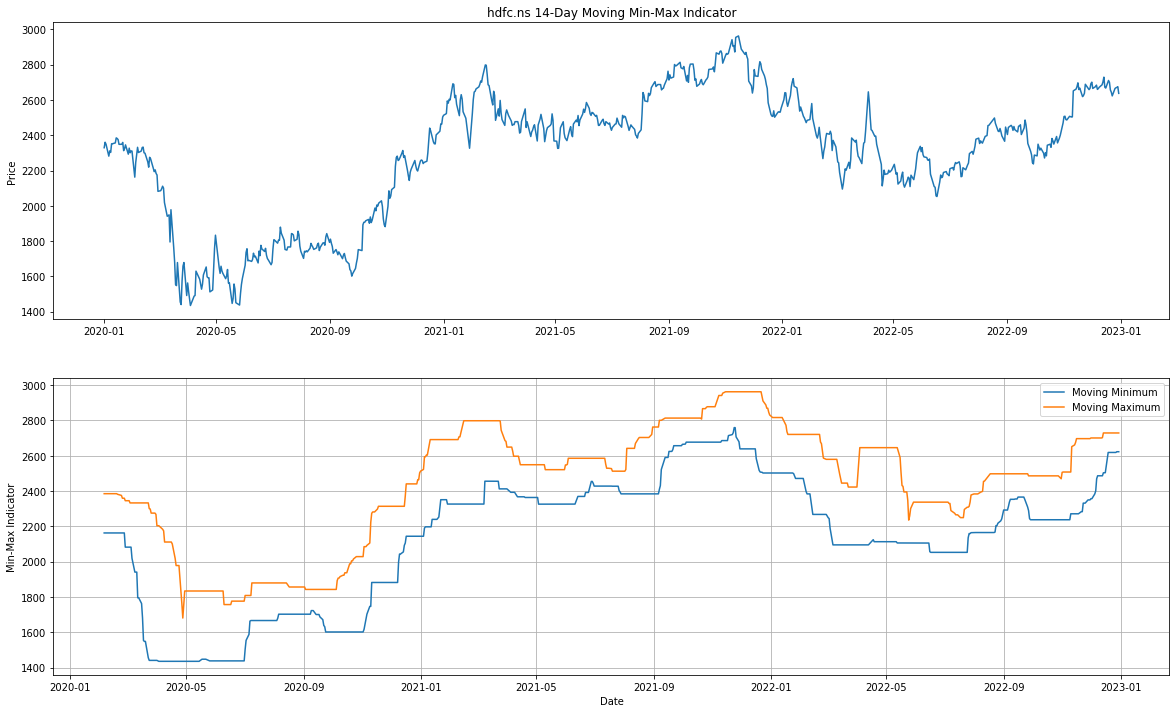

In [4]:
fig = plt.figure(figsize=(20,12))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title(symbol +' ' + str(n) + '-Day Moving Min-Max Indicator')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Moving_Minimum'], label='Moving Minimum')
ax2.plot(df['Moving_Maximum'], label='Moving Maximum')
ax2.grid()
ax2.set_ylabel('Min-Max Indicator')
ax2.legend(loc='best')
ax2.set_xlabel('Date')

## Candlestick with Min-Max Indicator

In [5]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Minimum_Price,Moving_Minimum,Maximum_Price,Moving_Maximum,VolumePositive
0,18261.770833,2418.00,2438.500000,2409.000000,2433.949951,2329.374512,945874,NaN,NaN,NaN,NaN,False
1,18262.770833,2430.00,2472.750000,2422.000000,2466.399902,2360.430176,1701396,NaN,NaN,NaN,NaN,False
2,18263.770833,2455.00,2466.399902,2441.800049,2454.449951,2348.993652,1963923,NaN,NaN,NaN,NaN,False
3,18266.770833,2428.00,2445.000000,2371.399902,2384.100098,2281.666748,2656731,NaN,NaN,NaN,NaN,False
4,18267.770833,2401.25,2428.800049,2380.199951,2415.050049,2311.286621,3771992,NaN,NaN,NaN,NaN,False


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Date')

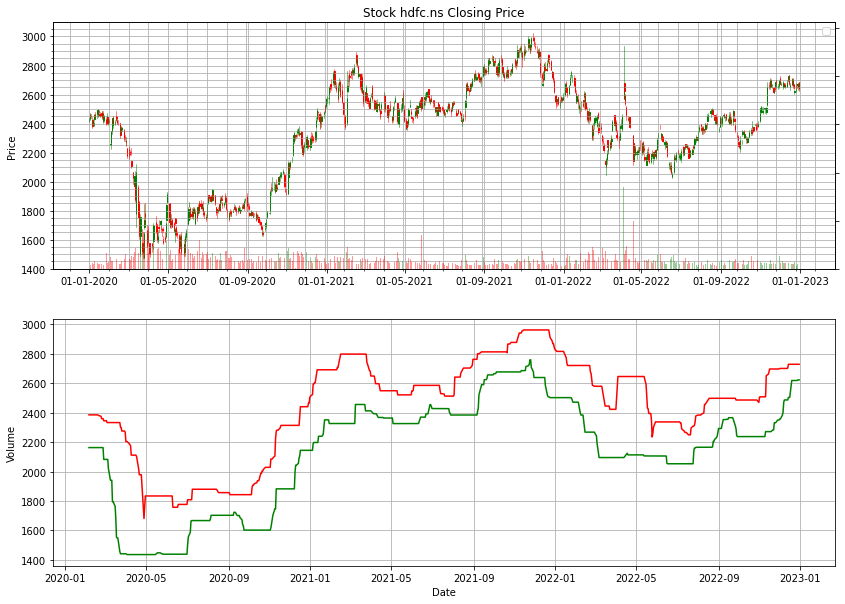

In [6]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend()

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Moving_Minimum'], color='green')
ax2.plot(df['Moving_Maximum'], color='red')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')